# 오늘 수업 아래 코드 반복임
# 여기에서 broadcasting 주의
# 제대로 피팅되지 않으면 lr 바꾸기
# 그리고 torch.optim.SGD 함수


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (x-3) ** 2 + 2*(y-5)**2 +10

x = torch.tensor([7.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

history=[]
epochs=100
lr = 0.1

for i in range(epochs):
    x.grad = None
    y.grad = None
    ff = f(x,y)
    ff.backward()
    x.data = x.data - lr*x.grad
    y.data = y.data - lr*y.grad
    history.append(ff.item())

plt.plot(history)

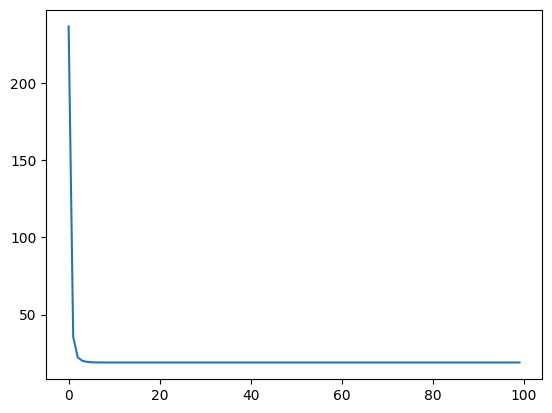

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

b = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
history = []
lr = 0.01
epochs=100

for i in range(epochs):
    yhat = b + X*w
    loss = torch.sum((Y-yhat)**2) ############## broadcasting으로 가능, 따라서 차원 주의해야 함.
    loss.backward()
    # (b,w) = (b,w) - lr(b.grad, w.grad) # loss의 gradient
    b.data = b.data - lr*(b.grad)
    w.data = w.data - lr*(w.grad)
    b.grad.zero_()
    w.grad.zero_()
    history.append(loss.item())

plt.plot(history)


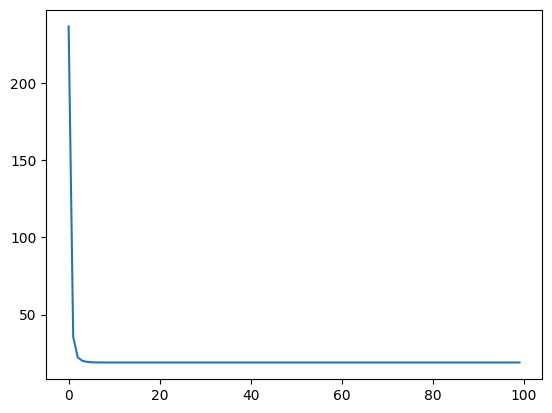

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

b = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
history = []
lr = 0.01
epochs=100

def forward(xx):
    return b + w*xx

def loss_ftn(yy, yyhat):
    return torch.sum((yy-yyhat)**2)

for i in range(epochs):
    yhat = forward(X) ############## 이 줄과
    loss = loss_ftn(Y, yhat) ############# 이 줄을 함수로 대체
    loss.backward()
    # (b,w) = (b,w) - lr(b.grad, w.grad) # loss의 gradient
    b.data = b.data - lr*(b.grad)
    w.data = w.data - lr*(w.grad)
    b.grad.zero_()
    w.grad.zero_()
    history.append(loss.item())

plt.plot(history)


# 새로운 함수 - SGD 사용
w = w - lr*w.grad랑
b = b - lr*b.grad를
자동으로 해주는 함수 =>
### torch.optim.SGD([w,b], lr=0.1)
다만 이거 하기 전에 grad는 해줘야 함


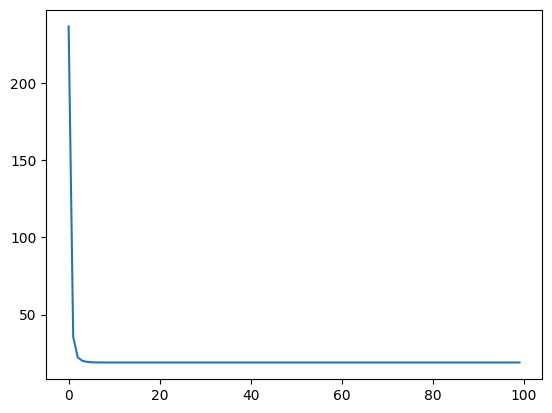

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

b = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)
history = []
lr = 0.01
epochs=100

my_optimizer = torch.optim.SGD([w,b], lr=0.01)

def forward(xx):
    return b + w*xx

def loss_ftn(yy, yyhat):
    return torch.sum((yy-yyhat)**2)

for i in range(epochs):
    yhat = forward(X)
    loss = loss_ftn(Y, yhat)
    loss.backward()
    my_optimizer.step()
    my_optimizer.zero_grad()
    history.append(loss.item())

plt.plot(history)


In [ ]:
## Y만 바꿈
Y = Y.reshape(-1)

## 코드는 그대로
def loss_ftn(yy, yyhat):
    return torch.sum((yy-yyhat)**2)

## 이걸 그대로 쓰면 broadcasting이 이상하게 됨
## 그래서 완전 틀린 답이 나옴(심지어 오류가 나지도 않고 그냥 답이 나와버림)

